In [198]:
import numpy as np
from itertools import product

In [86]:
import numpy as np
from itertools import combinations

def codespace_distance_sumzero(B):
    """
    Given a binary matrix B, finds the minimum number k such that
    some k columns sum to zero mod 2.
    """
    n_cols = B.shape[1]

    for k in range(1, n_cols + 1):
        for cols in combinations(range(n_cols), k):
            submatrix = B[:, cols]
            col_sum = np.sum(submatrix, axis=1) % 2
            if np.all(col_sum == 0):
                #print(submatrix)
                return k  # Found k columns summing to zero
    return None  # Should not happen unless B is weird


In [78]:
def random_binary_matrix_one_or_two_ones_unique(m, n, seed=None):
    """
    Generate an m x n binary matrix where each row has 1 or 2 ones,
    and no duplicate rows.
    """
    if seed is not None:
        np.random.seed(seed)

    max_unique_rows = n + (n * (n - 1)) // 2
    if m > max_unique_rows:
        raise ValueError("Too many rows requested: not enough unique 1-or-2-one rows possible.")

    rows = set()
    matrix = []

    while len(matrix) < m:
        row = np.zeros(n, dtype=int)
        num_ones = np.random.choice([1, 2])  # Pick 1 or 2 ones
        ones_positions = np.random.choice(n, size=num_ones, replace=False)
        row[ones_positions] = 1

        row_tuple = tuple(row)

        if row_tuple not in rows:
            rows.add(row_tuple)
            matrix.append(row)

    return np.array(matrix)

In [83]:
d_max = -1
B_max = None
for i in range(1000):
    B = random_binary_matrix_one_or_two_ones_unique(15, 9)
    d = codespace_distance_sumzero(B.T)
    if d_max < d:
        d_max = d
        B_max = B
        if d == 4: break
print(d)


4


In [84]:
# Great! A code distance of 4 means that we get a quartic boost in the probability amplitude of the optimal solution!
d_max

4

In [85]:
B_max

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [100]:
B_max.shape[0]

15

In [101]:
v = np.ones(B_max.shape[0], dtype=int)  # 10 entries, all 1
v[0] = 0
v[6] = 0
v[11] = 0

In [103]:
def count_satisfied_constraints(assignment, B, c):
    """
    assignment: array-like of 4 binary variables (b1, b2, b3, b4)
    returns: number of satisfied constraints
    """
    assignment = np.array(assignment) % 2  # make sure it's mod 2
    lhs = (B @ assignment) % 2
    satisfied = (lhs == c)
    return np.sum(satisfied)

In [104]:
# Example usage:
assignment = np.random.randint(0, 2, size=(B.shape[1]))  # example assignment
num_satisfied = count_satisfied_constraints(assignment, B, v)
print(f"Assignment {assignment} satisfies {num_satisfied} out of {(B.shape[0])} constraints.")

Assignment [0 0 1 1 0 0 1 1 1] satisfies 7 out of 15 constraints.


In [200]:
# Enumerate all 2^4 = 16 possible assignments
all_assignments = list(itertools.product([0, 1], repeat=B.shape[1]))

# Track best assignments
best_count = -1
best_assignments = []

for assignment in all_assignments:
    count = count_satisfied_constraints(assignment, B, v)
    if count > best_count:
        best_count = count
        best_assignments = [assignment]
    elif count == best_count:
        best_assignments.append(assignment)

# Display results
print(f"Best number of satisfied constraints: {best_count} out of {(B.shape[0])}")
print("Best assignment(s):")
for assignment in best_assignments:
    print(assignment)


Best number of satisfied constraints: 13 out of 15
Best assignment(s):
(1, 0, 1, 1, 1, 1, 0, 0, 0)


In [109]:
B

array([[0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0]])

## How do the probabilities scale?

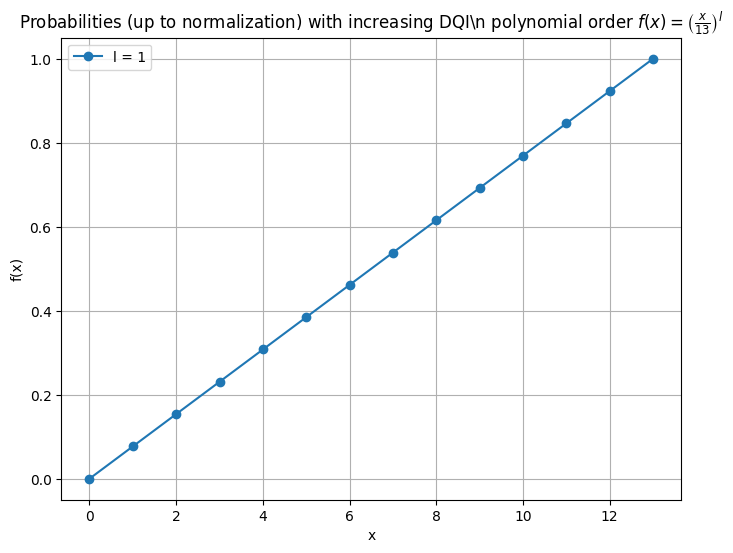

In [211]:
import matplotlib.pyplot as plt

# Define x values
x = np.arange(0, 14)

# Plot for different l values
l_values = [1]

plt.figure(figsize=(8,6))


for l in l_values:
    y = (x/13)**l
    plt.plot(x, y, marker='o', label=f"l = {l}")

plt.title(r"Probabilities (up to normalization) with increasing DQI\n polynomial order $f(x) = \left(\frac{x}{13}\right)^l$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.savefig("dqi_perf.png")
plt.show()


# To get the QUBO instance generated by this problem

In [185]:
import sympy as sp
import numpy as np

def symbolic_expand_and_extract_Q_precise(S, penalty_cells, M_penalty=20):
    """
    Expand F(b) = sum_i b_i + sum_j (1 - sum_i S_ji b_i)^2 + M * sum_penalty_cells b_i
    symbolically and extract Q and const such that F(b) = b^T Q b + const
    with only single-variable b_i replaced by b_i^2
    """
    m, n = S.shape

    # Define symbolic variables b1, ..., bn
    b = sp.Matrix(sp.symbols(f"b1:{n+1}"))  # b1, ..., b9

    # Define F(b)
    F = sum(b)  # sum_i b_i

    for j in range(m):
        inner_sum = sum(S[j, i] * b[i] for i in range(n))
        F += (1 - inner_sum)**2

    # Add penalty terms
    F += M_penalty * sum(b[i] for i in penalty_cells)

    # Expand F
    F = sp.expand(F)

    # Now selectively replace single b_i terms (degree 1) with b_i**2
    F_replaced = 0
    for term in F.as_ordered_terms():
        variables = term.free_symbols
        if len(variables) == 1:
            # Single-variable term like b1
            var = list(variables)[0]
            F_replaced += term.subs(var, var**2)
        else:
            F_replaced += term

    F = sp.expand(F_replaced)

    # Now collect into a quadratic form: F = b^T Q b + const
    Q = sp.zeros(n, n)
    const = F

    # Collect terms
    for i in range(n):
        for k in range(i, n):
            coeff = F.coeff(b[i] * b[k])
            if i == k:
                Q[i,i] += coeff
                const -= coeff * b[i]**2
            else:
                Q[i,k] += coeff/2
                Q[k,i] += coeff/2
                const -= coeff * b[i] * b[k]

    const = const.simplify()

    return Q, const

In [186]:
# Example usage:

S = np.array([
    [0,0,0,1,0,0,0,1,0],
    [0,0,0,1,0,0,0,1,0],
    [0,1,0,0,0,0,1,0,0],
    [1,0,0,1,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,1,0],
    [0,1,0,0,1,0,0,0,0]
])

penalty_cells = [1, 7, 8]  # Where no-go zones are

In [194]:
Q, const = symbolic_expand_and_extract_Q_precise(S, penalty_cells, M_penalty=10)
sp.Matrix(Q)

Matrix([
[-5, 1, 0,  2,  0, 0,  0, 0,  0],
[ 1, 3, 0,  0,  2, 0,  1, 0,  0],
[ 0, 0, 1,  0,  0, 0,  0, 0,  0],
[ 2, 0, 0, -9,  1, 0,  0, 2,  0],
[ 0, 2, 0,  1, -7, 0,  0, 1,  0],
[ 0, 0, 0,  0,  0, 1,  0, 0,  0],
[ 0, 1, 0,  0,  0, 0, -1, 0,  0],
[ 0, 0, 0,  2,  1, 0,  0, 5,  0],
[ 0, 0, 0,  0,  0, 0,  0, 0, 11]])

In [195]:
Q.shape

(9, 9)

In [196]:
print(Q)

Matrix([[-5, 1, 0, 2, 0, 0, 0, 0, 0], [1, 3, 0, 0, 2, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0], [2, 0, 0, -9, 1, 0, 0, 2, 0], [0, 2, 0, 1, -7, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, -1, 0, 0], [0, 0, 0, 2, 1, 0, 0, 5, 0], [0, 0, 0, 0, 0, 0, 0, 0, 11]])


In [201]:
# Now pass this Q to the QAOA simulator